In [11]:
from skimage import exposure
import matplotlib.pyplot as plt
import argparse
import cv2
import numpy as np

In [4]:
src = cv2.imread('img1.jpg')
ref = cv2.imread('img2.jpg')

multi = True

matched = exposure.match_histograms(src, ref, multichannel=multi)

<ipython-input-4-8111a0b34d26>:6: FutureWarning: `multichannel` is a deprecated argument name for `match_histograms`. It will be removed in version 1.0. Please use `channel_axis` instead.
  matched = exposure.match_histograms(src, ref, multichannel=multi)


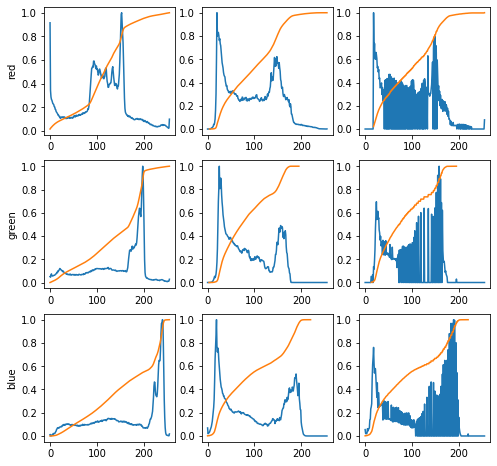

In [5]:
(fig, axs) =  plt.subplots(nrows=3, ncols=3, figsize=(8, 8))

for (i, image) in enumerate((src, ref, matched)):
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	for (j, color) in enumerate(("red", "green", "blue")):
		(hist, bins) = exposure.histogram(image[..., j],
			source_range="dtype")
		axs[j, i].plot(bins, hist / hist.max())
		(cdf, bins) = exposure.cumulative_distribution(image[..., j])
		axs[j, i].plot(bins, cdf)
		axs[j, 0].set_ylabel(color)

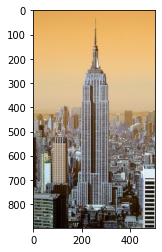

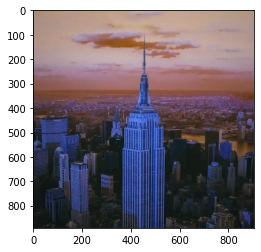

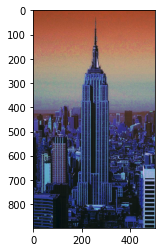

In [14]:
plt.imshow(src)
plt.show()
plt.imshow(ref)
plt.show()
plt.imshow(matched)
plt.show()